In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [562]:
#Dataframe dos indicados ao Oscar:

oscar = pd.read_csv('BigML_Dataset_5f50a62c2fb31c516d000176.csv')
oscar.head(1)

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0


In [563]:
#Dataframe dos filmes no site Rotten Tomatoes:

rotten = pd.read_csv('rotten_tomatoes_movies.csv')
rotten.head(1)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [564]:
oscar = oscar[['year', 'movie', 'certificate', 'duration', 'genre', 'rate', 'votes', 'metascore', 'Oscar_Best_Picture_won', 'Oscar_Best_Director_won', 'Oscar_Best_Actor_won', 'Oscar_Best_Actress_won']]
oscar.head()

,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won
0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,66660,44.0,No,No,No,No
1,2000,Chicken Run,G,84,Animation|Adventure|Comedy,7.0,144475,88.0,No,No,No,No
2,2005,Fantastic Four,PG-13,106,Action|Adventure|Family,5.7,273203,40.0,No,No,No,No
3,2002,Frida,R,123,Biography|Drama|Romance,7.4,63852,61.0,No,No,No,No
4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,1286275,92.0,No,No,No,No


In [565]:
oscar = oscar.dropna()

In [566]:
oscar = oscar [(oscar.year > 2000)]
oscar.reset_index(inplace = True, drop = False)
oscar.head()

,index,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won
0,0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,66660,44.0,No,No,No,No
1,2,2005,Fantastic Four,PG-13,106,Action|Adventure|Family,5.7,273203,40.0,No,No,No,No
2,3,2002,Frida,R,123,Biography|Drama|Romance,7.4,63852,61.0,No,No,No,No
3,4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,1286275,92.0,No,No,No,No
4,6,2002,Resident Evil,R,100,Action|Horror|Sci-Fi,6.7,204545,33.0,No,No,No,No


In [567]:

rotten = rotten[['movie_title', 'tomatometer_status', 'tomatometer_rating', 'audience_status', 'audience_rating']]
rotten.head(1)

,movie_title,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,Rotten,49.0,Spilled,53.0


In [568]:
rotten = rotten.dropna()

In [569]:
#Renomeando a coluna de nomes para que fiquem idênticas:
rotten.rename(columns = {'movie_title':'movie'}, inplace = True)

#Juntando os dataframes:
df_final = pd.merge(oscar, rotten, how = 'inner', on = 'movie')
df_final.head(1)

,index,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,66660,44.0,No,No,No,No,Rotten,50.0,Upright,62.0


In [570]:
# Verificando quantas linhas foram perdidas no merge:
print(f'Número de linhas do dataframe final: {df_final.shape[0]}')
print(f'Número de linhas perdidas no merge: {oscar.shape[0] - df_final.shape[0]}')
print(f'Percentual de perda de dados: {((oscar.shape[0] - df_final.shape[0]) * 100) / df_final.shape[0]:.2f}%')

Número de linhas do dataframe final: 1062
Número de linhas perdidas no merge: 27
Percentual de perda de dados: 2.54%


[Text(0.5, 0, 'Certificados'), Text(0, 0.5, 'Nº de ocorrências')]

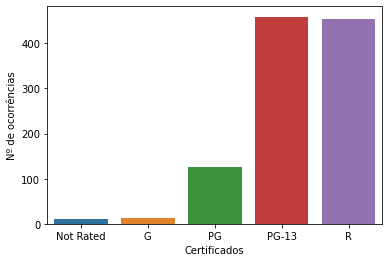

In [571]:
#Contando a frequência de cada classificação:
count_cert = df_final.groupby(['certificate']).size()

#Juntando classificações iguais, mas com termos distintos:
#Unrated e Not Rated:
count_cert['Not Rated'] += count_cert['Unrated']
del(count_cert['Unrated'])

#TV-MA e R:
count_cert['R'] += count_cert['TV-MA']
del(count_cert['TV-MA'])

#Organizando:
count_cert = count_cert.reindex(index = ['Not Rated', 'G', 'PG', 'PG-13', 'R'])

#Visualização:
count_cert.sort_values(ascending = False)

graph_cert = sns.barplot(x = count_cert.index, y = count_cert.values)
graph_cert.set(xlabel = 'Certificados', ylabel = 'Nº de ocorrências')

In [572]:
count_cert = count_cert.sort_values(ascending = False)

count_cert

certificate
PG-13        459
R            455
PG           125
G             13
Not Rated     10
dtype: int64

[Text(0.5, 0, 'Duração'), Text(0, 0.5, 'Nº de ocorrências')]

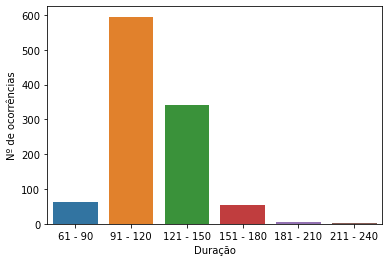

In [573]:

def n_break (n, start, end, mod, scale_cem = True):
    break_start = start
    break_end = end

    if scale_cem:
        while True:
            if (break_start <= n <= break_end):
                return f'{break_start} - {break_end}'
            else:
                break_start = break_end + 1
                break_end += mod
    
    else:
        while True:
            if (break_start <= n <= break_end):
                return f'{break_start} - {break_end}'
            else:
                break_start = break_end + 0.1
                break_end += mod


#Adicionando a coluna duration_break dos intervalos das durações:
count_dur = df_final
count_dur['duration_break'] = count_dur['duration'].apply(n_break, args = (1, 30, 30))

#Contando a frequência de cada intervalo:
count_dur = count_dur.groupby(['duration_break']).size()

#Organizando:
count_dur = count_dur.reindex(index = ['61 - 90', '91 - 120', '121 - 150', '151 - 180', '181 - 210', '211 - 240'])

#Visualização:
graph_cert = sns.barplot(x = count_dur.index, y = count_dur.values)
graph_cert.set(xlabel = 'Duração', ylabel = 'Nº de ocorrências')

In [574]:
#Em ordem:

count_dur = count_dur.sort_values(ascending = False)

count_dur

duration_break
91 - 120     595
121 - 150    342
61 - 90       64
151 - 180     54
181 - 210      6
211 - 240      1
dtype: int64

In [575]:
##Função para criar o dicionário com os gêneros e suas ocorrências:
def str_count (str, dict):
    dicio = dict

    if ('|' in str):
        str = str.split('|')

        for i in range (len(str)):
            if (str[i] in dicio.keys()):
                dicio[str[i]] += 1
        
            else:
                dicio[str[i]] = 1

    else:
        if (str in dicio.keys()):
            dicio[str] += 1
        
        else:
            dicio[str] = 1
    
    return dicio

#Criando o dicionário:
dicio_gen = {}

for i in range(len(df_final.index)):
    dicio_gen = str_count(df_final['genre'].iloc[i], dicio_gen)

count_gen = pd.DataFrame(list(dicio_gen.items()), columns = ['genre', 'occurrence'])

#Organizando:
count_gen = count_gen.sort_values(['occurrence'], ascending = False)

count_gen

,genre,occurrence
7,Drama,599
4,Adventure,297
3,Action,290
0,Comedy,281
2,Romance,186
11,Crime,165
12,Thriller,142
9,Sci-Fi,116
6,Biography,113
1,Fantasy,111


[Text(0.5, 0, 'IMDB'), Text(0, 0.5, 'Nº de ocorrências')]

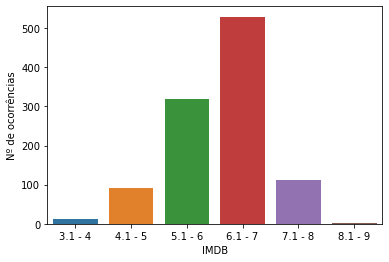

In [576]:
#A função a seguir servirá para corrigir os valores das Notas do IMBD:
def inteirar (n):
    return int(n)

#Adicionando a coluna rate_break dos intervalos das notas:
count_rate = df_final
count_rate = count_rate['rate'].apply(inteirar)

count_rate['rate_break'] = count_rate.apply(n_break, args = (0, 1, 1, False))

#Contando a frequência de cada intervalo:
count_rate = count_rate.groupby(['rate_break']).size()

#Visualização:
graph_rate = sns.barplot(x = count_rate.index, y = count_rate.values)
graph_rate.set(xlabel = 'IMDB', ylabel = 'Nº de ocorrências')

In [577]:
display(count_rate.sort_values(ascending = False))

rate
6.1 - 7    529
5.1 - 6    318
7.1 - 8    111
4.1 - 5     91
3.1 - 4     12
8.1 - 9      1
Name: rate, dtype: int64

[Text(0.5, 0, 'Metascore'), Text(0, 0.5, 'Nº de ocorrências')]

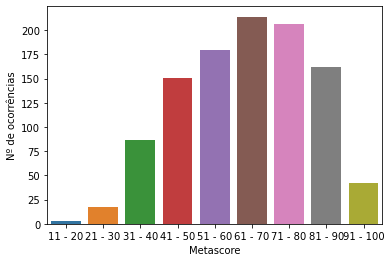

In [578]:
#Adicionando a coluna meta_break dos intervalos das notas:
count_meta = df_final
count_meta['meta_break'] = count_meta['metascore'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_meta = count_meta.groupby(['meta_break']).size()

#Visualização:
graph_meta = sns.barplot(x = count_meta.index, y = count_meta.values)
graph_meta.set(xlabel = 'Metascore', ylabel = 'Nº de ocorrências')

In [579]:
count_meta = count_meta.sort_values(ascending = False)

count_meta

meta_break
61 - 70     214
71 - 80     206
51 - 60     180
81 - 90     162
41 - 50     151
31 - 40      87
91 - 100     42
21 - 30      17
11 - 20       3
dtype: int64

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Nº de ocorrências')]

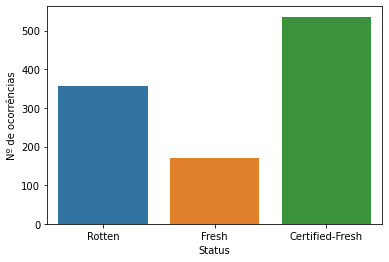

In [580]:
#Status do Tomatometer mais comum:

#Contando a frequência de cada status:
count_tomatometer = df_final.groupby(['tomatometer_status']).size()

count_tomatometer

#Organizando:
count_tomatometer = count_tomatometer.reindex(index = ['Rotten', 'Fresh', 'Certified-Fresh'])

#Visualização:
graph_tomatometer = sns.barplot(x = count_tomatometer.index, y = count_tomatometer.values)
graph_tomatometer.set(xlabel = 'Status', ylabel = 'Nº de ocorrências')

In [581]:
#Em ordem:

count_tomatometer = count_tomatometer.sort_values(ascending = False)

count_tomatometer

tomatometer_status
Certified-Fresh    536
Rotten             356
Fresh              170
dtype: int64

[Text(0.5, 0, 'Nota'), Text(0, 0.5, 'Nº de ocorrências')]

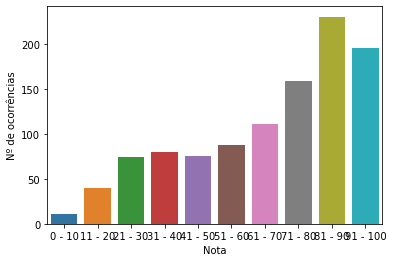

In [582]:
#O Tomatometer mais comum:

#Adicionando a coluna tomatometer_break dos intervalos das notas:
count_tomatometer_rating = df_final
count_tomatometer_rating['tomatometer_break'] = count_tomatometer_rating['tomatometer_rating'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_tomatometer_rating = count_tomatometer_rating.groupby(['tomatometer_break']).size()

#Visualização:
graph_cert = sns.barplot(x = count_tomatometer_rating.index, y = count_tomatometer_rating.values)
graph_cert.set(xlabel = 'Nota', ylabel = 'Nº de ocorrências')

In [583]:
#Em ordem:

count_tomatometer_rating_rating = count_tomatometer_rating.sort_values()

count_tomatometer_rating

tomatometer_break
0 - 10       11
11 - 20      40
21 - 30      74
31 - 40      80
41 - 50      75
51 - 60      87
61 - 70     111
71 - 80     159
81 - 90     230
91 - 100    195
dtype: int64

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Nº de ocorrências')]

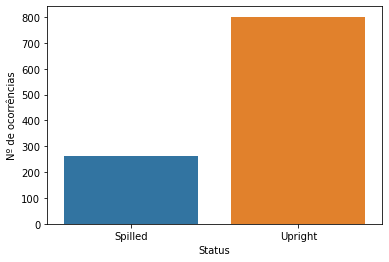

In [584]:
#O status da audiência mais comum:

#Contando a frequência de cada status:
count_audience = df_final.groupby(['audience_status']).size()

#Visualização:
graph_audience = sns.barplot(x = count_audience.index, y = count_audience.values)
graph_audience.set(xlabel = 'Status', ylabel = 'Nº de ocorrências')

In [585]:
#Em ordem:

count_audience = count_audience.sort_values(ascending = False)

count_audience

audience_status
Upright    801
Spilled    261
dtype: int64

[Text(0.5, 0, 'Nota'), Text(0, 0.5, 'Nº de ocorrências')]

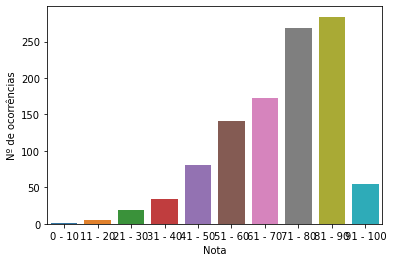

In [586]:
#A nota do público mais comum:

#Adicionando a coluna audience_break dos intervalos das notas:
count_audience_rating = df_final
count_audience_rating['audience_break'] = count_audience_rating['audience_rating'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_audience_rating = count_audience_rating.groupby(['audience_break']).size()

#Visualização:
graph_audience = sns.barplot(x = count_audience_rating.index, y = count_audience_rating.values)
graph_audience.set(xlabel = 'Nota', ylabel = 'Nº de ocorrências')

In [587]:
#Em ordem:

count_audience_rating = count_audience_rating.sort_values(ascending = False)

count_audience_rating

audience_break
81 - 90     284
71 - 80     269
61 - 70     173
51 - 60     141
41 - 50      81
91 - 100     55
31 - 40      34
21 - 30      19
11 - 20       5
0 - 10        1
dtype: int64

# RESPOSTAS A PARTIR DAQUI

In [621]:
#Utilizar o "Certified Fresh" e o "Upright" para categorizar um filme como bem recebido no Tomatometer e nas notas dos usuários do site:

df_cut = df_final[df_final['tomatometer_status'] == 'Certified-Fresh']
df_cut = df_cut[df_cut['audience_status'] == 'Upright']
df_cut.reset_index(inplace = True, drop = False)
for col in df_cut.columns:
    if 'index' in col:
        del df_cut[col]
    elif 'level_0' in col:
        del df_cut[col]        
df_cut


,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break
0,2002,Frida,R,123,Biography|Drama|Romance,7.4,63852,61.0,No,No,No,No,Certified-Fresh,75.0,Upright,85.0,121 - 150,61 - 70,71 - 80,81 - 90
1,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,1286275,92.0,No,No,No,No,Certified-Fresh,91.0,Upright,95.0,151 - 180,91 - 100,91 - 100,91 - 100
2,2005,Star Wars: Episode III - Revenge of the Sith,PG-13,140,Action|Adventure|Fantasy,7.6,543318,68.0,No,No,No,No,Certified-Fresh,80.0,Upright,66.0,121 - 150,61 - 70,71 - 80,61 - 70
3,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,483447,84.0,No,No,No,No,Certified-Fresh,88.0,Upright,90.0,61 - 90,81 - 90,81 - 90,81 - 90
4,2001,Planet of the Apes,PG-13,119,Action|Adventure|Sci-Fi,5.7,181213,50.0,No,No,No,No,Certified-Fresh,87.0,Upright,87.0,91 - 120,41 - 50,81 - 90,81 - 90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017,The Shape of Water,R,123,Adventure|Drama|Fantasy,7.9,47034,86.0,No,No,No,No,Certified-Fresh,92.0,Upright,72.0,121 - 150,81 - 90,91 - 100,71 - 80
514,2017,The Florida Project,R,111,Drama,7.8,15058,92.0,No,No,No,No,Certified-Fresh,96.0,Upright,80.0,91 - 120,91 - 100,91 - 100,71 - 80
515,2017,Call Me by Your Name,R,132,Drama|Romance,8.3,38170,93.0,No,No,No,No,Certified-Fresh,94.0,Upright,86.0,121 - 150,91 - 100,91 - 100,81 - 90
516,2017,Phantom Thread,R,130,Drama|Romance,8.4,7380,90.0,No,No,No,No,Certified-Fresh,91.0,Upright,71.0,121 - 150,81 - 90,91 - 100,71 - 80


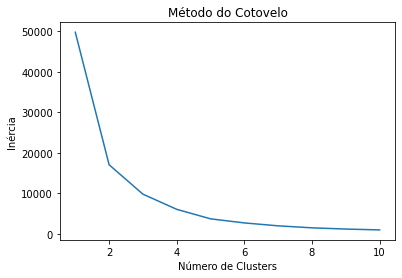

In [622]:
#A partir daqui, temos um dataframe que contém apenas os filmes mais bem avaliados do site do Rotten. Agora, vamos usar esse dataframe para agrupar esses dados conforme as notas do IMDb e do Metacritic. Usaremos o método do cotovelo para determinar qual o melhor número de grupos que podemos formar:

#Dataframe auxiliar para plotar o gráfico:
aux = df_cut.reindex(columns = ['rate', 'metascore'])

#Aplicando o método:
inercia = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(aux)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

In [623]:
#O valor 2 mostra ser o ponto de "cotovelo" do gráfico, assim, faremos 2 grupos:

#Aplicando:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(aux)

#Dataframe com o cluster:
aux['cluster'] = clusters
df_cut['cluster'] = clusters
df_cut

,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,...,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break,cluster
0,2002,Frida,R,123,Biography|Drama|Romance,7.4,63852,61.0,No,No,...,No,Certified-Fresh,75.0,Upright,85.0,121 - 150,61 - 70,71 - 80,81 - 90,0
1,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,1286275,92.0,No,No,...,No,Certified-Fresh,91.0,Upright,95.0,151 - 180,91 - 100,91 - 100,91 - 100,1
2,2005,Star Wars: Episode III - Revenge of the Sith,PG-13,140,Action|Adventure|Fantasy,7.6,543318,68.0,No,No,...,No,Certified-Fresh,80.0,Upright,66.0,121 - 150,61 - 70,71 - 80,61 - 70,0
3,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,483447,84.0,No,No,...,No,Certified-Fresh,88.0,Upright,90.0,61 - 90,81 - 90,81 - 90,81 - 90,1
4,2001,Planet of the Apes,PG-13,119,Action|Adventure|Sci-Fi,5.7,181213,50.0,No,No,...,No,Certified-Fresh,87.0,Upright,87.0,91 - 120,41 - 50,81 - 90,81 - 90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017,The Shape of Water,R,123,Adventure|Drama|Fantasy,7.9,47034,86.0,No,No,...,No,Certified-Fresh,92.0,Upright,72.0,121 - 150,81 - 90,91 - 100,71 - 80,1
514,2017,The Florida Project,R,111,Drama,7.8,15058,92.0,No,No,...,No,Certified-Fresh,96.0,Upright,80.0,91 - 120,91 - 100,91 - 100,71 - 80,1
515,2017,Call Me by Your Name,R,132,Drama|Romance,8.3,38170,93.0,No,No,...,No,Certified-Fresh,94.0,Upright,86.0,121 - 150,91 - 100,91 - 100,81 - 90,1
516,2017,Phantom Thread,R,130,Drama|Romance,8.4,7380,90.0,No,No,...,No,Certified-Fresh,91.0,Upright,71.0,121 - 150,81 - 90,91 - 100,71 - 80,1


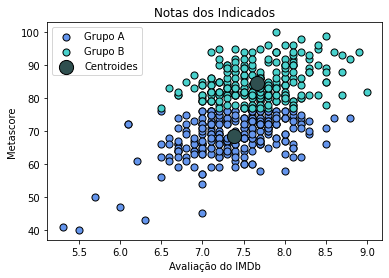

In [625]:
#Plot do gráfico:
x = aux.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='cornflowerblue',
    edgecolor='black',
    label='Grupo A'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='mediumturquoise',
    edgecolor='black',
    label='Grupo B'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='darkslategrey', edgecolor='black',
    label='Centroides'
)

plt.title("Notas dos Indicados")
plt.xlabel("Avaliação do IMDb")
plt.ylabel("Metascore")

plt.legend()
plt.show()

In [627]:
#Assumindo somente os filmes do grupo B:
df_cut = df_cut [(df_cut.cluster == 1)]
df_cut.reset_index(inplace = True, drop = False)
df_cut.drop(["index"], axis = 1, inplace = True)

print(f'Número de filmes que restaram: {df_cut.shape[0]}.')

Número de filmes que restaram: 243.


In [628]:
df_cut

,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,...,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break,cluster
0,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,1286275,92.0,No,No,...,No,Certified-Fresh,91.0,Upright,95.0,151 - 180,91 - 100,91 - 100,91 - 100,1
1,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,483447,84.0,No,No,...,No,Certified-Fresh,88.0,Upright,90.0,61 - 90,81 - 90,81 - 90,81 - 90,1
2,2001,Ghost World,R,111,Comedy|Drama,7.4,98471,88.0,No,No,...,No,Certified-Fresh,93.0,Upright,84.0,91 - 120,81 - 90,91 - 100,81 - 90,1
3,2001,Mulholland Drive,R,147,Drama|Mystery|Thriller,8.0,247207,81.0,No,No,...,No,Certified-Fresh,83.0,Upright,87.0,121 - 150,81 - 90,81 - 90,81 - 90,1
4,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,8.9,1264277,94.0,Yes,Yes,...,No,Certified-Fresh,93.0,Upright,86.0,181 - 210,91 - 100,91 - 100,81 - 90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2017,The Shape of Water,R,123,Adventure|Drama|Fantasy,7.9,47034,86.0,No,No,...,No,Certified-Fresh,92.0,Upright,72.0,121 - 150,81 - 90,91 - 100,71 - 80,1
239,2017,The Florida Project,R,111,Drama,7.8,15058,92.0,No,No,...,No,Certified-Fresh,96.0,Upright,80.0,91 - 120,91 - 100,91 - 100,71 - 80,1
240,2017,Call Me by Your Name,R,132,Drama|Romance,8.3,38170,93.0,No,No,...,No,Certified-Fresh,94.0,Upright,86.0,121 - 150,91 - 100,91 - 100,81 - 90,1
241,2017,Phantom Thread,R,130,Drama|Romance,8.4,7380,90.0,No,No,...,No,Certified-Fresh,91.0,Upright,71.0,121 - 150,81 - 90,91 - 100,71 - 80,1


Classificação indicativa 

[Text(0.5, 0, 'Certificados'), Text(0, 0.5, 'Nº de ocorrências')]

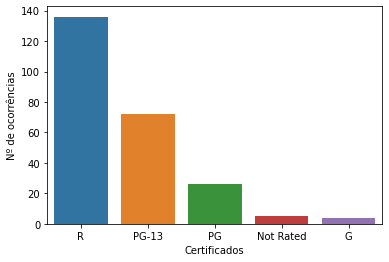

In [637]:
#Contando a frequência de cada classificação:
count_cert_cut = df_cut.groupby(['certificate']).size()

#Organizando:
count_cert_cut = count_cert_cut.reindex(index = ['Not Rated', 'G', 'PG', 'PG-13', 'R'])

#Visualização:
count_cert_cut = count_cert_cut.sort_values(ascending = False)

graph_cert_cut = sns.barplot(x = count_cert_cut.index, y = count_cert_cut.values)
graph_cert_cut.set(xlabel = 'Certificados', ylabel = 'Nº de ocorrências')

In [638]:
count_cert_cut = count_cert_cut.sort_values(ascending = False)

count_cert_cut

certificate
R            136
PG-13         72
PG            26
Not Rated      5
G              4
dtype: int64

Os filmes mais bem avaliados são da categoria 'R'(Adulta). Quanto maior sua restrição, melhores tendem a ser suas avaliações. 

Duração

[Text(0.5, 0, 'Duração'), Text(0, 0.5, 'Nº de ocorrências')]

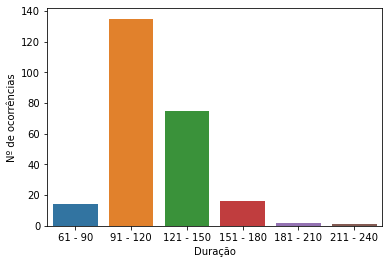

In [639]:
#A função a seguir devolve o intervalo em que o número está. A generalizamos para uso futuro:
def n_break (n, start, end, mod, scale_cem = True):
    break_start = start
    break_end = end

    if scale_cem:
        while True:
            if (break_start <= n <= break_end):
                return f'{break_start} - {break_end}'
            else:
                break_start = break_end + 1
                break_end += mod
    
    else:
        while True:
            if (break_start <= n <= break_end):
                return f'{break_start} - {break_end}'
            else:
                break_start = break_end + 0.1
                break_end += mod

#Adicionando a coluna duration_break dos intervalos das durações:
count_dur_cut = df_cut
count_dur_cut['duration_break'] = count_dur_cut['duration'].apply(n_break, args = (1, 30, 30))

#Contando a frequência de cada intervalo:
count_dur_cut = count_dur_cut.groupby(['duration_break']).size()

#Organizando:
count_dur_cut = count_dur_cut.reindex(index = ['61 - 90', '91 - 120', '121 - 150', '151 - 180', '181 - 210', '211 - 240'])

#Visualização:
graph_cert_cut = sns.barplot(x = count_dur_cut.index, y = count_dur_cut.values)
graph_cert_cut.set(xlabel = 'Duração', ylabel = 'Nº de ocorrências')

In [642]:
count_dur_cut = count_dur_cut.sort_values(ascending = False)

count_dur_cut

duration_break
91 - 120     135
121 - 150     75
151 - 180     16
61 - 90       14
181 - 210      2
211 - 240      1
dtype: int64

Os filmes com melhores avaliações apresentam uma média de 1 hora e meia até 2 horas de duração.

Gênero

In [643]:
#Função para criar o dicionário com os gêneros e suas ocorrências:
def str_count (str, dict):
    dicio = dict

    if ('|' in str):
        str = str.split('|')

        for i in range (len(str)):
            if (str[i] in dicio.keys()):
                dicio[str[i]] += 1
        
            else:
                dicio[str[i]] = 1

    else:
        if (str in dicio.keys()):
            dicio[str] += 1
        
        else:
            dicio[str] = 1
    
    return dicio

#Criando o dicionário:
dicio_gen_cut = {}

for i in range(len(df_cut.index)):
    dicio_gen_cut = str_count(df_cut['genre'].iloc[i], dicio_gen_cut)

count_gen_cut = pd.DataFrame(list(dicio_gen_cut.items()), columns = ['genre', 'occurrence'])

#Organizando:
count_gen_cut = count_gen_cut.sort_values(['occurrence'], ascending = False)

count_gen_cut

,genre,occurrence
1,Drama,195
4,Comedy,61
0,Adventure,48
10,Romance,40
13,Biography,33
12,Crime,29
8,Action,27
6,Thriller,27
3,Animation,24
5,Mystery,21


Os filmes de Drama possuem uma larga vantagem quando comparado a qualquer outro gênero, na opinião dos do público.

Notas IMDB

[Text(0.5, 0, 'IMDB'), Text(0, 0.5, 'Nº de ocorrências')]

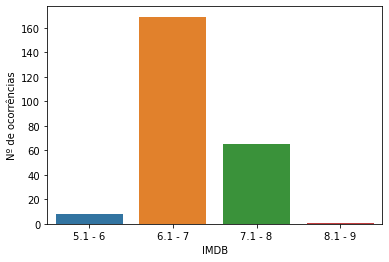

In [644]:
#A função a seguir servirá para corrigir os valores das Notas do IMBD:
def inteirar (n):
    return int(n)

#Adicionando a coluna rate_break dos intervalos das notas:
count_rate_cut = df_cut
count_rate_cut = count_rate_cut['rate'].apply(inteirar)

count_rate_cut['rate_break'] = count_rate_cut.apply(n_break, args = (0, 1, 1, False))

#Contando a frequência de cada intervalo:
count_rate_cut = count_rate_cut.groupby(['rate_break']).size()

#Visualização:
graph_rate_cut = sns.barplot(x = count_rate_cut.index, y = count_rate_cut.values)
graph_rate_cut.set(xlabel = 'IMDB', ylabel = 'Nº de ocorrências')

In [645]:
#Em ordem:

count_rate_cut = count_rate_cut.sort_values(ascending = False)

count_rate_cut

rate
6.1 - 7    169
7.1 - 8     65
5.1 - 6      8
8.1 - 9      1
Name: rate, dtype: int64

Surpreendentemente, existe uma descrepância entre as notas do portal IMDB e do site Rotten Tomatoes, com grande parte dos filmes mais bem avaliados por aqueles que surfam na página do fruto, presentes numa categoria abaixo da nota 7.

[Text(0.5, 0, 'Metascore'), Text(0, 0.5, 'Nº de ocorrências')]

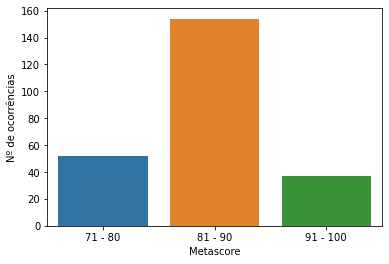

In [646]:
#Metascore mais comum:

#Adicionando a coluna meta_break dos intervalos das notas:
count_meta_cut = df_cut
count_meta_cut['meta_break'] = count_meta_cut['metascore'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_meta_cut = count_meta_cut.groupby(['meta_break']).size()

#Visualização:
graph_meta_cut = sns.barplot(x = count_meta_cut.index, y = count_meta_cut.values)
graph_meta_cut.set(xlabel = 'Metascore', ylabel = 'Nº de ocorrências')

In [647]:
#Em ordem:

count_meta_cut = count_meta_cut.sort_values(ascending = False)

count_meta_cut

meta_break
81 - 90     154
71 - 80      52
91 - 100     37
dtype: int64

Já em comparação ao MetaScore, temos dados mais consistentes, com grande maioria das notas se aproximando daquelas vistas no proprio site do Rotten: entre 81-90. 

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Nº de ocorrências')]

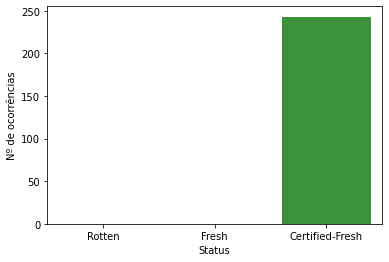

In [648]:
#Status do Tomatometer mais comum:

#Contando a frequência de cada status:
count_tomatometer_cut = df_cut.groupby(['tomatometer_status']).size()

count_tomatometer_cut

#Organizando:
count_tomatometer_cut = count_tomatometer_cut.reindex(index = ['Rotten', 'Fresh', 'Certified-Fresh'])

#Visualização:
graph_tomatometer_cut = sns.barplot(x = count_tomatometer_cut.index, y = count_tomatometer_cut.values)
graph_tomatometer_cut.set(xlabel = 'Status', ylabel = 'Nº de ocorrências')

In [649]:
#Em ordem:

count_tomatometer_cut = count_tomatometer_cut.sort_values(ascending = False)

count_tomatometer_cut

tomatometer_status
Certified-Fresh    243.0
Rotten               NaN
Fresh                NaN
dtype: float64

Resultado Esperado.

[Text(0.5, 0, 'Nota'), Text(0, 0.5, 'Nº de ocorrências')]

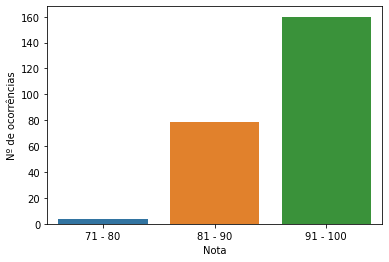

In [651]:
#O Tomatometer mais comum:

#Adicionando a coluna tomatometer_break dos intervalos das notas:
count_tomatometer_rating_cut = df_cut
count_tomatometer_rating_cut['tomatometer_break'] = count_tomatometer_rating_cut['tomatometer_rating'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_tomatometer_rating_cut = count_tomatometer_rating_cut.groupby(['tomatometer_break']).size()

#Visualização:
graph_cert_cut = sns.barplot(x = count_tomatometer_rating_cut.index, y = count_tomatometer_rating_cut.values)
graph_cert_cut.set(xlabel = 'Nota', ylabel = 'Nº de ocorrências')

In [652]:
#Em ordem

count_tomatometer_rating_cut = count_tomatometer_rating_cut.sort_values(ascending = False)

count_tomatometer_rating_cut

tomatometer_break
91 - 100    160
81 - 90      79
71 - 80       4
dtype: int64

Como esperado, aquie se encontram a maioria dos filmes que atingiram 90% ou mais de aprovação.  

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Nº de ocorrências')]

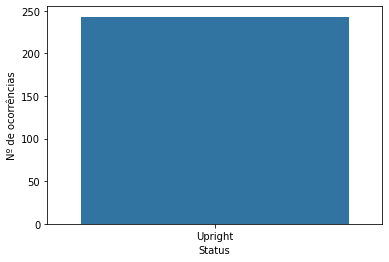

In [653]:
#O status da audiência mais comum:

#Contando a frequência de cada status:
count_audience_cut = df_cut.groupby(['audience_status']).size()

#Visualização:
graph_audience_cut = sns.barplot(x = count_audience_cut.index, y = count_audience_cut.values)
graph_audience_cut.set(xlabel = 'Status', ylabel = 'Nº de ocorrências')

In [654]:
#Em ordem:

count_audience_cut = count_audience_cut.sort_values(ascending = False)

count_audience_cut

audience_status
Upright    243
dtype: int64

Resultado Esperado.

[Text(0.5, 0, 'Nota'), Text(0, 0.5, 'Nº de ocorrências')]

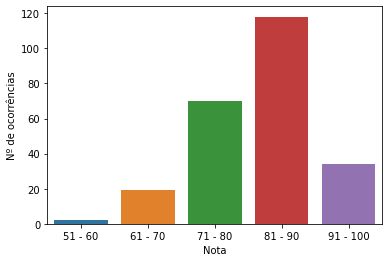

In [655]:
#A nota do público mais comum:

#Adicionando a coluna audience_break dos intervalos das notas:
count_audience_rating_cut = df_cut
count_audience_rating_cut['audience_break'] = count_audience_rating_cut['audience_rating'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_audience_rating_cut = count_audience_rating_cut.groupby(['audience_break']).size()

#Visualização:
graph_audience_cut = sns.barplot(x = count_audience_rating_cut.index, y = count_audience_rating_cut.values)
graph_audience_cut.set(xlabel = 'Nota', ylabel = 'Nº de ocorrências')

In [656]:
#Em ordem:

count_audience_rating_cut = count_audience_rating_cut.sort_values(ascending = False)

count_audience_rating_cut

audience_break
81 - 90     118
71 - 80      70
91 - 100     34
61 - 70      19
51 - 60       2
dtype: int64

In [661]:
#Pegando os vencedores da categoria no dataframe:

df_oscars = df_final[(df_final.Oscar_Best_Picture_won == 'Yes')]
df_oscars.reset_index(inplace = True, drop = False)

for col in df_oscars.columns:
    if 'index' in col:
        del df_oscars[col]
    elif 'level_0' in col:
        del df_oscars[col]

df_oscars = df_oscars.drop(labels=15, axis=0)
print(df_oscars.shape[0])
df_oscars

15


,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break
0,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,8.9,1264277,94.0,Yes,Yes,No,No,Certified-Fresh,93.0,Upright,86.0,181 - 210,91 - 100,91 - 100,81 - 90
1,2001,A Beautiful Mind,PG-13,135,Biography|Drama,8.2,640458,72.0,Yes,Yes,No,No,Certified-Fresh,74.0,Upright,93.0,121 - 150,71 - 80,71 - 80,91 - 100
2,2002,Chicago,PG-13,113,Comedy|Crime|Musical,7.2,176942,82.0,Yes,No,No,No,Certified-Fresh,86.0,Upright,83.0,91 - 120,81 - 90,81 - 90,81 - 90
3,2004,Crash,R,112,Crime|Drama|Thriller,7.8,368775,69.0,Yes,No,No,No,Certified-Fresh,74.0,Upright,88.0,91 - 120,61 - 70,71 - 80,81 - 90
4,2004,Million Dollar Baby,PG-13,132,Drama|Sport,8.1,501680,86.0,Yes,Yes,No,Yes,Certified-Fresh,91.0,Upright,90.0,121 - 150,81 - 90,91 - 100,81 - 90
5,2006,The Departed,R,151,Crime|Drama|Thriller,8.5,910945,85.0,Yes,Yes,No,No,Certified-Fresh,91.0,Upright,94.0,151 - 180,81 - 90,91 - 100,91 - 100
6,2007,No Country for Old Men,R,122,Crime|Drama|Thriller,8.1,640561,91.0,Yes,Yes,No,No,Certified-Fresh,93.0,Upright,86.0,121 - 150,91 - 100,91 - 100,81 - 90
7,2008,The Hurt Locker,R,131,Drama|History|Thriller,7.6,343364,94.0,Yes,Yes,No,No,Certified-Fresh,97.0,Upright,84.0,121 - 150,91 - 100,91 - 100,81 - 90
8,2008,Slumdog Millionaire,R,120,Drama,8.0,661819,86.0,Yes,Yes,No,No,Certified-Fresh,91.0,Upright,90.0,91 - 120,81 - 90,91 - 100,81 - 90
9,2012,Argo,R,120,Biography|Drama|History,7.7,468444,86.0,Yes,No,No,No,Certified-Fresh,96.0,Upright,90.0,91 - 120,81 - 90,91 - 100,81 - 90


In [662]:
import warnings
warnings.filterwarnings('ignore')

def zero_a_cem (a):
    return round(a * 10, 1)

def compare (a, b, c, d):
    if (a > b and a > c and a > d):
        return 'Tomatometer'
    elif (b > a and b > c and b > d):
        return 'Audience Rating - RT'
    elif (c > a and c > b and c > d):
        return 'Metascore'
    elif (d > a and d > b and d > c):
        return 'IMDb Rate'
    else:
        return 'Draw'

df_oscars['rate'] = df_oscars['rate'].apply(zero_a_cem)
df_oscars['indicator'] = df_oscars.apply(lambda x: compare(x["tomatometer_rating"], x["audience_rating"], x['metascore'], x['rate']), axis = 1)
df_oscars

,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,...,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break,indicator
0,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,89.0,1264277,94.0,Yes,Yes,...,No,Certified-Fresh,93.0,Upright,86.0,181 - 210,91 - 100,91 - 100,81 - 90,Metascore
1,2001,A Beautiful Mind,PG-13,135,Biography|Drama,82.0,640458,72.0,Yes,Yes,...,No,Certified-Fresh,74.0,Upright,93.0,121 - 150,71 - 80,71 - 80,91 - 100,Audience Rating - RT
2,2002,Chicago,PG-13,113,Comedy|Crime|Musical,72.0,176942,82.0,Yes,No,...,No,Certified-Fresh,86.0,Upright,83.0,91 - 120,81 - 90,81 - 90,81 - 90,Tomatometer
3,2004,Crash,R,112,Crime|Drama|Thriller,78.0,368775,69.0,Yes,No,...,No,Certified-Fresh,74.0,Upright,88.0,91 - 120,61 - 70,71 - 80,81 - 90,Audience Rating - RT
4,2004,Million Dollar Baby,PG-13,132,Drama|Sport,81.0,501680,86.0,Yes,Yes,...,Yes,Certified-Fresh,91.0,Upright,90.0,121 - 150,81 - 90,91 - 100,81 - 90,Tomatometer
5,2006,The Departed,R,151,Crime|Drama|Thriller,85.0,910945,85.0,Yes,Yes,...,No,Certified-Fresh,91.0,Upright,94.0,151 - 180,81 - 90,91 - 100,91 - 100,Audience Rating - RT
6,2007,No Country for Old Men,R,122,Crime|Drama|Thriller,81.0,640561,91.0,Yes,Yes,...,No,Certified-Fresh,93.0,Upright,86.0,121 - 150,91 - 100,91 - 100,81 - 90,Tomatometer
7,2008,The Hurt Locker,R,131,Drama|History|Thriller,76.0,343364,94.0,Yes,Yes,...,No,Certified-Fresh,97.0,Upright,84.0,121 - 150,91 - 100,91 - 100,81 - 90,Tomatometer
8,2008,Slumdog Millionaire,R,120,Drama,80.0,661819,86.0,Yes,Yes,...,No,Certified-Fresh,91.0,Upright,90.0,91 - 120,81 - 90,91 - 100,81 - 90,Tomatometer
9,2012,Argo,R,120,Biography|Drama|History,77.0,468444,86.0,Yes,No,...,No,Certified-Fresh,96.0,Upright,90.0,91 - 120,81 - 90,91 - 100,81 - 90,Tomatometer


In [668]:
#Agrupando e criando o ranking:

indicator_count = df_oscars.groupby(['indicator']).size()
indicator_count = indicator_count.sort_values(ascending = False)

indicator_count

indicator
Tomatometer             9
Audience Rating - RT    3
Metascore               3
dtype: int64

In [671]:
#Comparando com as médias:

tomatometer_mean = df_oscars[['tomatometer_rating']].mean()
audience_mean = df_oscars[['audience_rating']].mean()
metascore_mean = df_oscars[['metascore']].mean()
imdb_mean = df_oscars[['rate']].mean()

print(tomatometer_mean)
print(audience_mean)
print(metascore_mean)
print(imdb_mean)

tomatometer_rating    88.466667
dtype: float64
audience_rating    87.533333
dtype: float64
metascore    87.333333
dtype: float64
rate    80.533333
dtype: float64
